# Cryogenic LNA scalling 

--------

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### 1. Scaling npn and estimate operation region with gummel plot and with $V_{BE} = V_{CE}$ 

In the open-source PDK of ihp130, we have three different model of npn transistor 
1. ```npn13g2``` with fixed emitter area $0.07 \times 0.9 \mu m^2$
2. ```npn13g2l``` with emitter's width fix  $E_w = 0.07 \mu m$ and varible emitter length $E_l =  [1 - 4] \mu m$
3. ```npn13g2v``` with emitter's width fix  $E_w = 0.12 \mu m$ and varible emitter length $E_l =  2.5 \mu m$

### 1.1. First approach, we increase the Emitter in a row ($N_x$) and try to plot their gummel plot. Note that their are some limitation for each model

1. ```npn13g2``` can have maximum 10 emitters for a single transistor
2. ```npn13g2v``` can have maximum 8 emitters for a single transistor
3. 1. ```npn13g2l``` can have maximum 4 emitters for a single transistor

In [2]:
nx_g2 = 10
nx_g2l = 4
nx_g2v = 8

In [3]:
sg13g2 = np.genfromtxt('gummel_npn13g2_Nx.txt')
sg13g2 = sg13g2[1:-1]
sg13g2l = np.genfromtxt('gummel_npn13g2l_Nx.txt')
sg13g2l = sg13g2l[1:-1]
sg13g2v = np.genfromtxt('gummel_npn13g2v_Nx.txt')
sg13g2v = sg13g2v[1:-1]


We first plot the gummel plot for each model 

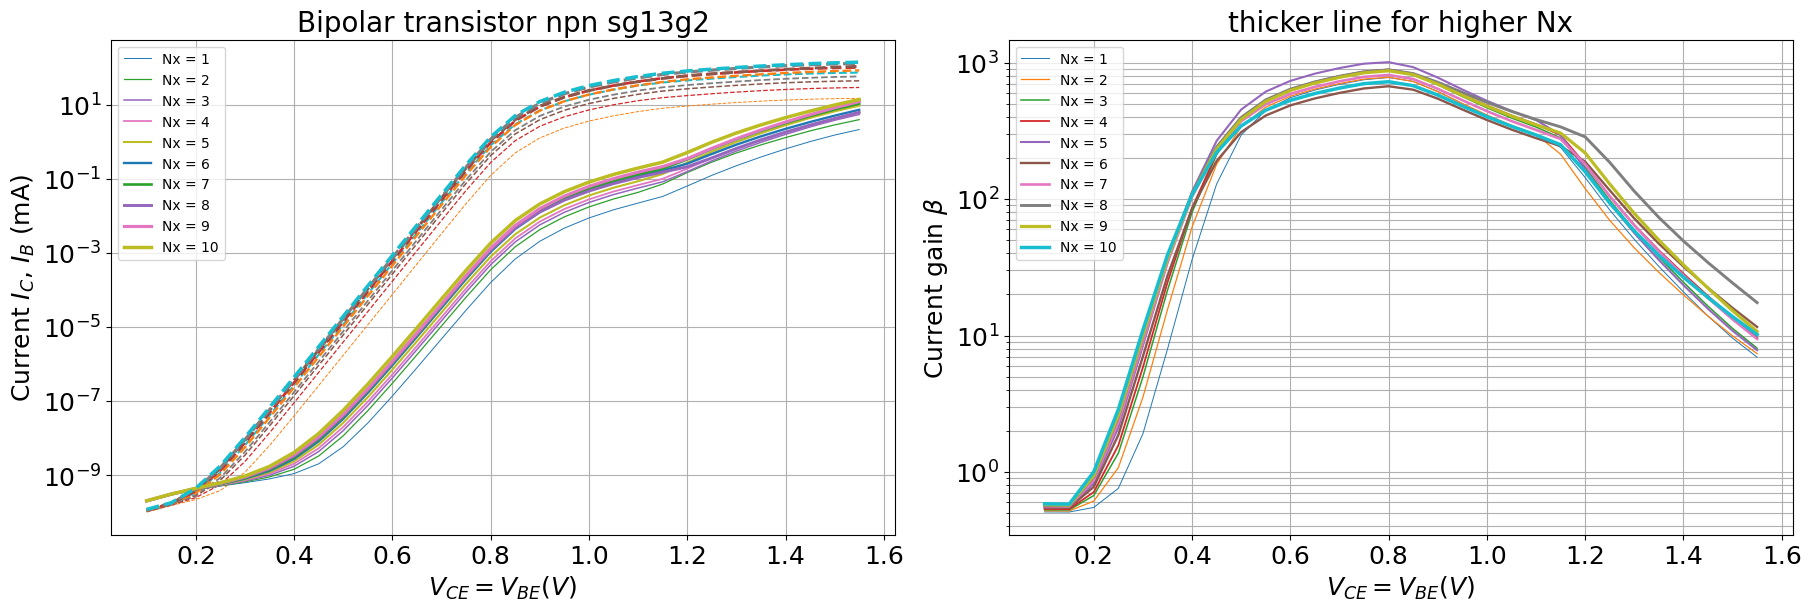

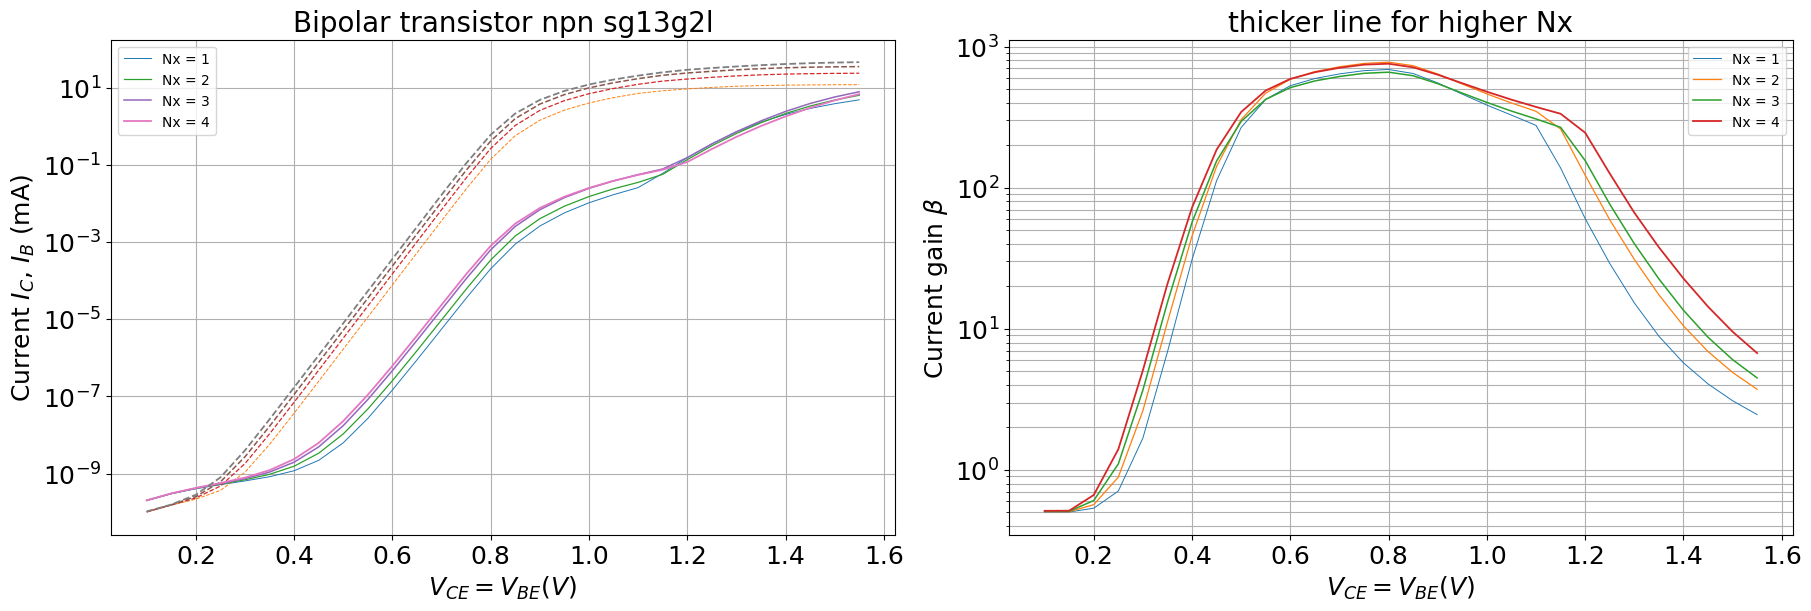

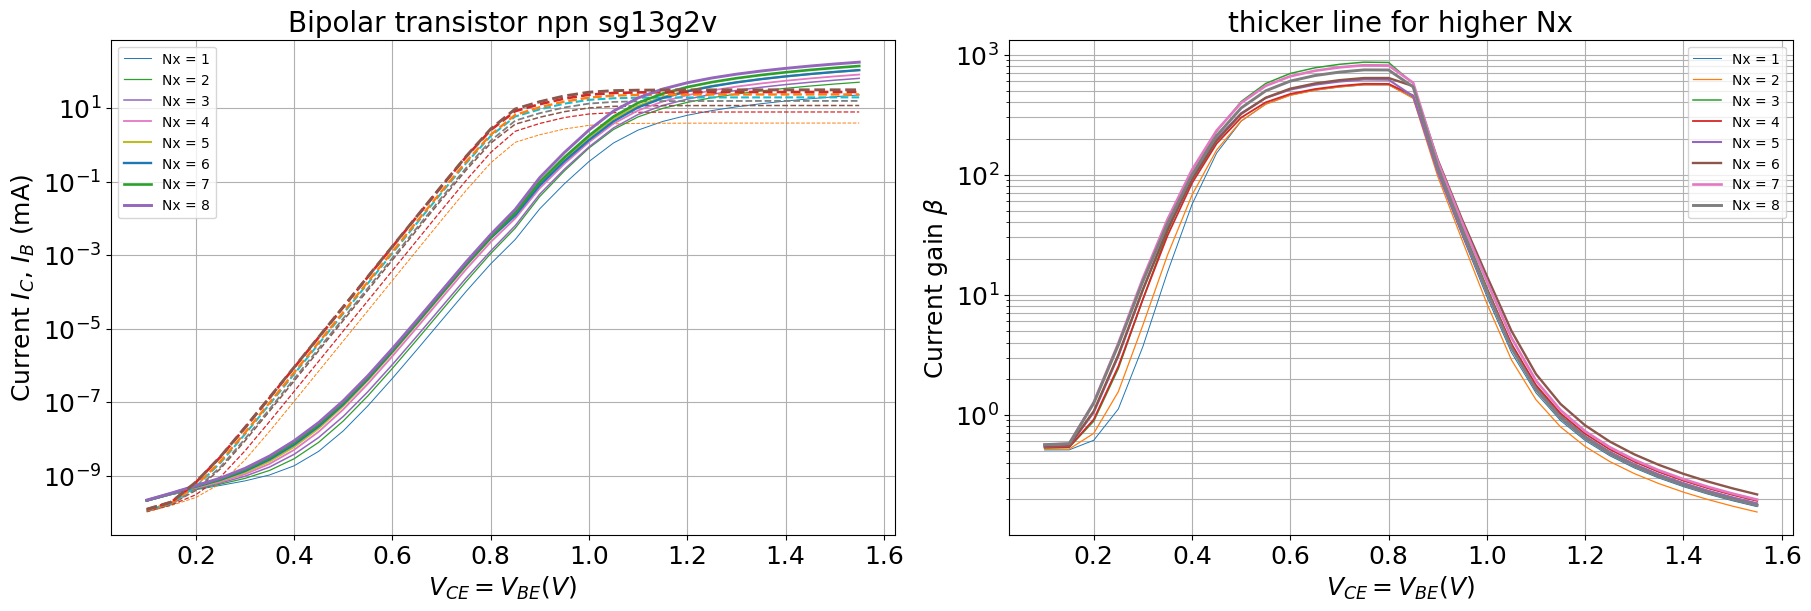

In [97]:
# def plot_dat(data, ind_array, name, size):
#     plt.figure(figsize = size)
#     plt.subplot(211)
#     for i in ind_array:
#         plt.plot(data[:,0], ib1[:,i])
#     plt.plot(data
nx_arr = [nx_g2,nx_g2l,nx_g2v]
dat_arr = [sg13g2,sg13g2l,sg13g2v]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(nx_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.subplot(121)
    plt.gca().set_title(f'Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    for i in range(1,nx_arr[j]+1):
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i]*1e3, label = f'Nx = {i}', lw = 0.5 + 0.2*i)
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+nx_arr[j]]*1e3,linestyle = 'dashed', lw = 0.5 + 0.2*i)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$ (mA)',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.legend()
    plt.subplot(122)
    plt.gca().set_title('thicker line for higher Nx', fontsize = 20)
    for i in range(1,nx_arr[j]+1):
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+2*nx_arr[j]], label = f'Nx = {i}', lw = 0.5 + 0.2*i)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.legend()
    plt.show()


Overplot them in case m = 1, m=10 and m = 20 (m is number of transistors in parallel)

In [12]:
# num_ind = [1,10,20]
# count = 20
# plt.figure(figsize = (18,6),constrained_layout=True)
# # plt.title('Bipolar transistor npn13g2',fontsize = 18)
# plt.subplot(121)
# # plt.gca().set_title('Bipolar transistor npn sg13g2',fontsize = 20)
# for i in (num_ind):
#     plt.plot(ib1[:,0], ib1[:,i]*1e3, label = f'Ib, sg13g2, m = {i}' )
#     plt.plot(ic1[:,0], ic1[:,i]*1e3, label = f'Ic, sg13g2, m = {i}' )
#     plt.plot(ib1[:,0], ib1[:,i+count]*1e3,linestyle = 'dashed', label = f'Ib, sg13g2l, m = {i}')
#     plt.plot(ic1[:,0], ic1[:,i+count]*1e3,linestyle = 'dashed', label = f'Ic, sg13g2l, m = {i}')
#     plt.plot(ib1[:,0], ib1[:,i+count*2]*1e3,linestyle = 'dotted', label = f'Ib, sg13g2v, m = {i}')
#     plt.plot(ic1[:,0], ic1[:,i+count*2]*1e3,linestyle = 'dotted', label = f'Ic, sg13g2v, m = {i}')
# plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
# plt.ylabel(r'Current $I_C$, $I_B$ (mA)',fontsize = 18)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.grid(True, which = 'both')
# plt.xlim(0.8,1.6)
# plt.ylim(0,600)
# plt.legend()
# plt.subplot(122)
# for i in (num_ind):
#     plt.semilogy(beta1[:,0], beta1[:,i], label = f'sg13g2, m = {i}')
#     plt.semilogy(beta1[:,0], beta1[:,i+count],linestyle = 'dashed', label = f'sg13g2l, m = {i}')
#     plt.semilogy(beta1[:,0], beta1[:,i+count*2],linestyle = 'dotted', label = f'sg13g2v, m = {i}')
#     # plt.loglog( ic1[:,i]        *1e3,beta1[:,i]        ,  label = f'sg13g2, m = {i}')
#     # plt.loglog( ic1[:,i+count]  *1e3,beta1[:,i+count]  , linestyle = 'dashed', label = f'sg13g2l, m = {i}')
#     # plt.loglog( ic1[:,i+count*2]*1e3,beta1[:,i+count*2], linestyle = 'dotted', label = f'sg13g2v, m = {i}')
# plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
# plt.ylabel(r'Current gain $\beta$',fontsize = 18)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.grid(True, which = 'both')
# plt.legend()
# plt.xlim(0.1,1.6)
# plt.show()

## 1.2. Montecarlo simulation for each model

In [13]:
MC_sg13g2 = np.genfromtxt('gummel_npn13g2_MC.txt')
MC_sg13g2 = MC_sg13g2[1:-1]
MC_sg13g2l = np.genfromtxt('gummel_npn13g2l_MC.txt')
MC_sg13g2l = MC_sg13g2l[1:-1]
MC_sg13g2v = np.genfromtxt('gummel_npn13g2v_MC.txt')
MC_sg13g2v = MC_sg13g2v[1:-1]


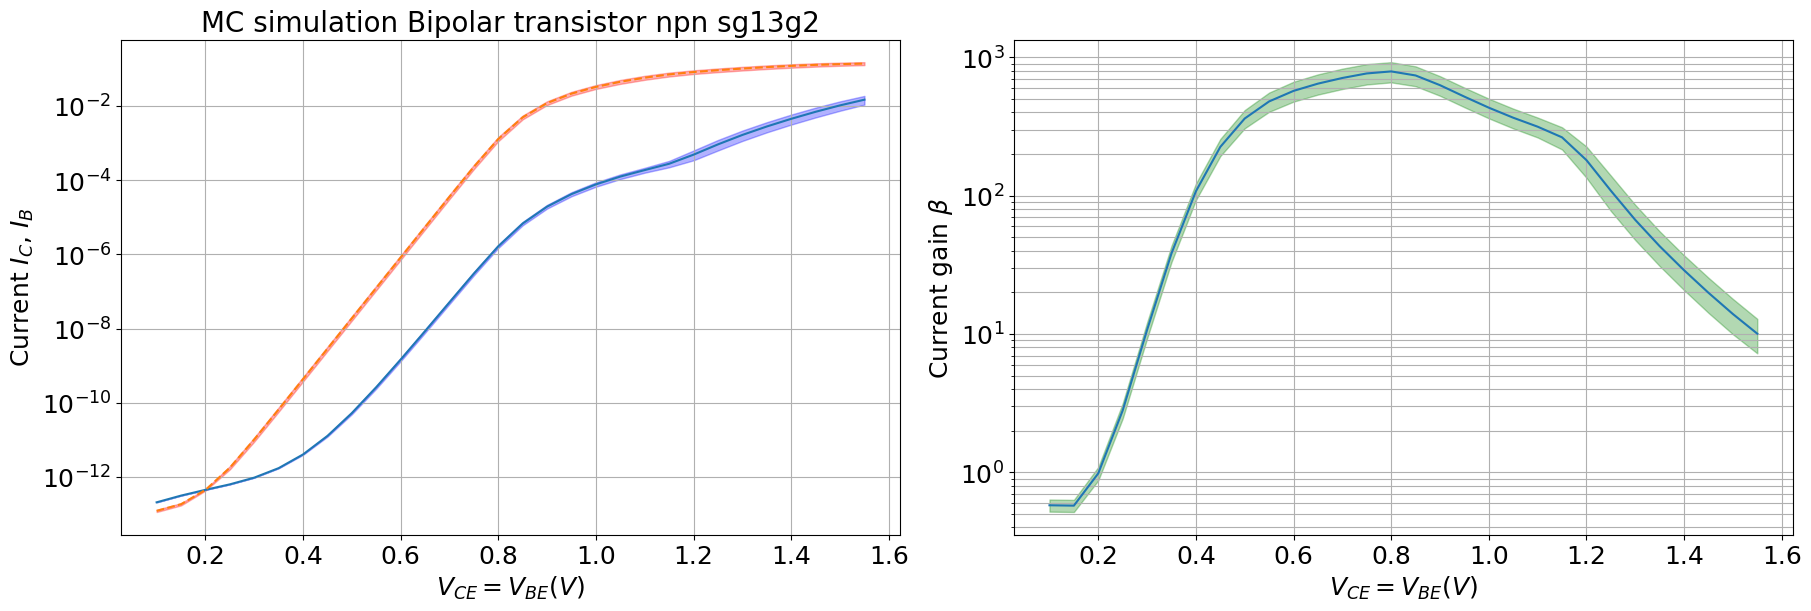

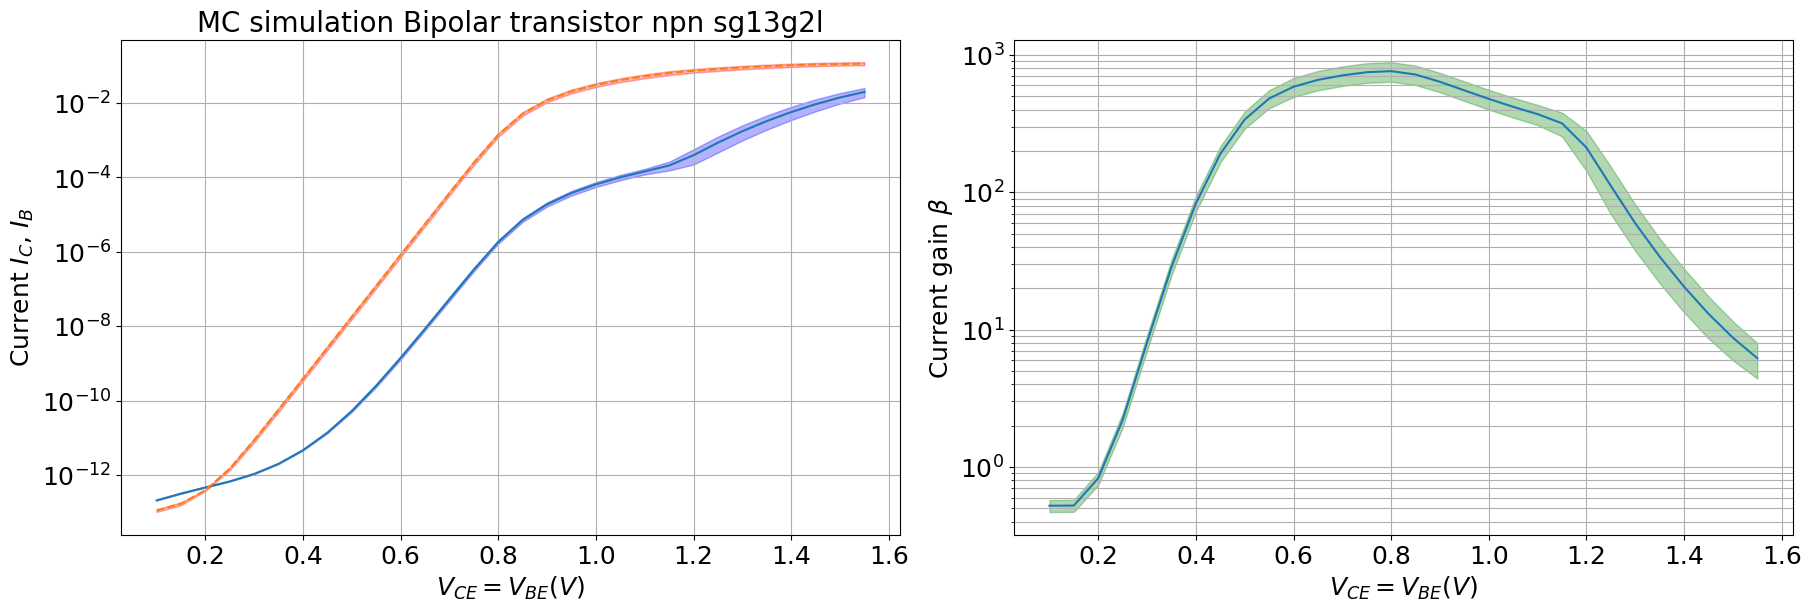

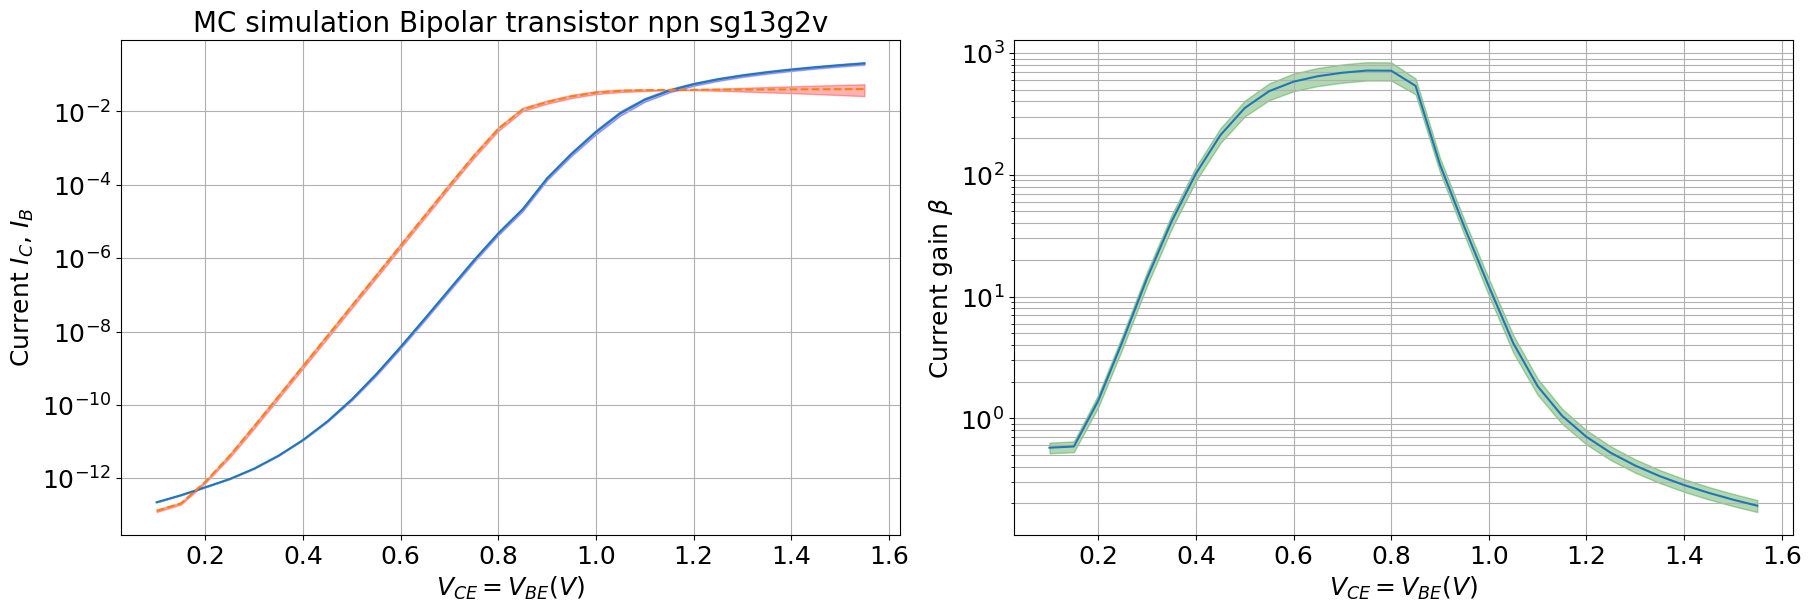

In [99]:
# ic = MC_sg13g2[:,100:200]
# ib = MC_sg13g2[:,1:100]
# ib_mean = np.mean(ib, axis = 1)
# ib_std = np.std(ib, axis = 1)
# ic_mean = np.mean(ic, axis = 1)
# ic_std = np.std(ic, axis = 1)
# plt.figure()

# plt.plot(MC_sg13g2[:,0], ic_mean)
# plt.fill_between(MC_sg13g2[:,0], ic_mean - ic_std,ic_mean + ic_std, color='r', alpha=0.3)
# plt.yscale('log')
# plt.plot(MC_sg13g2[:,0], ib_mean)
# plt.fill_between(MC_sg13g2[:,0], ib_mean - ib_std,ib_mean + ib_std, color='b', alpha=0.3)
ib_mean_MC = []
ic_mean_MC = []
beta_mean_MC = []
ib_std_MC = []
ic_std_MC = []
beta_std_MC = []
MC_num = 100
dat_arr = [MC_sg13g2,MC_sg13g2l,MC_sg13g2v]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(dat_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.subplot(121)
    plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    ib_mean = np.mean(dat_arr[j][:,1:MC_num], axis = 1)
    ib_std = np.std(dat_arr[j][:,1:MC_num], axis = 1)
    ic_mean = np.mean(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ic_std = np.std(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ib_mean_MC.append(ib_mean)
    ib_std_MC.append(ib_std )
    ic_mean_MC.append(ic_mean)
    ic_std_MC.append(ic_std )
    
    plt.plot(dat_arr[j][:,0], ib_mean)
    plt.fill_between(dat_arr[j][:,0], ib_mean + ib_std, ib_mean - ib_std, color = 'b', alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean,linestyle = 'dashed')
    plt.fill_between(dat_arr[j][:,0], ic_mean + ic_std, ic_mean - ic_std, color = 'r', alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.subplot(122)
    beta_mean = np.mean(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_std = np.std(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_mean_MC.append(beta_mean)
    beta_std_MC.append(beta_std )
    plt.plot(dat_arr[j][:,0], beta_mean)
    plt.fill_between(dat_arr[j][:,0], beta_mean + beta_std, beta_mean - beta_std, color = 'g', alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.show()


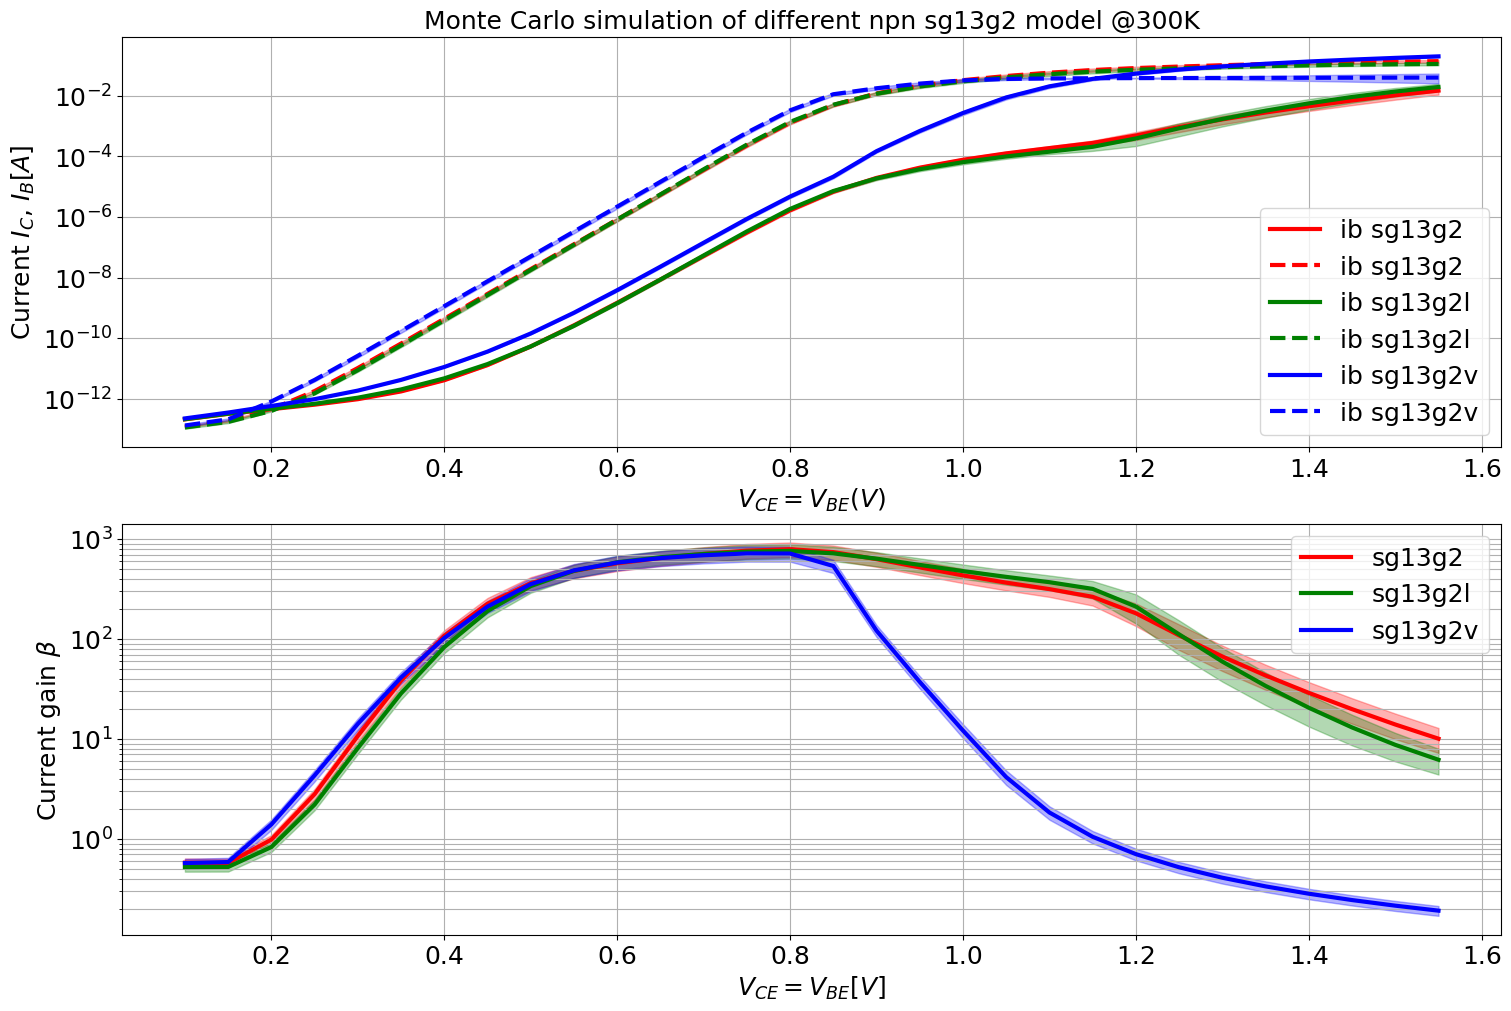

In [100]:
col = ['r','g','b']
plt.figure(figsize = (15,10),constrained_layout=True)

# plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
plt.subplot(211)
plt.gca().set_title('Monte Carlo simulation of different npn sg13g2 model @300K',fontsize = 18)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], ib_mean_MC[i], color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ib_mean_MC[i] + ib_std_MC[i], ib_mean_MC[i] - ib_std_MC[i], color = col[i], alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean_MC[i],linestyle = 'dashed', color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ic_mean_MC[i] + ic_std_MC[i], ic_mean_MC[i] - ic_std_MC[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
plt.ylabel(r'Current $I_C$, $I_B [A]$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'lower right')
plt.subplot(212)  
# plt.figure(figsize = (15,10),constrained_layout=True)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], beta_mean_MC[i],color = col[i], lw = 3, label = f'{dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], beta_mean_MC[i] + beta_std_MC[i], beta_mean_MC[i] - beta_std_MC[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} [V]$',fontsize = 18)
plt.ylabel(r'Current gain $\beta$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'upper right')
plt.savefig('npn_sg13g2_gummel.png')
plt.show()

The model ```sg13g2v``` seems very different from the other, it could because of the difference in emitter area, that leads to different current density. We can propose otherway to make them in a quite similar condition. In this case is the similar emitter's area

$$ A_E = N_x (E_l \times Ew) $$

where $N_X$ is the number of emitter in a row, $E_l$ and $E_w$ are the emitter length and width.

* Since ```npn13g2v``` cannot be change in $El$, so we can use this device as a reference device, that means we have to modify params from other device to have the same emitter area. So $A_{e,f} = 0.12 \times 2.5 /mu m^2$
* The model ```npn13g2``` has fixed $A_e = 0.07 \times 0.09 \mu m^2 $ and has maximum $N_x = 10$, we can try to have 4 ```npn13g2``` with $N_x = 10$ and 1 ```npn13g2``` with $N_x = 7$ in parallels to have emitter area approximate $A_{e,f}$
* The model ```npn13g2l``` has maximum $A_e = 0.07 \times 4 \mu m^2 $ and has maximum $N_x = 4$, we can try to have 2 ```npn13g2l``` with $N_x = 4$ with maximum emitter area and 2 ```npn13g2l``` with $N_x = 2$ with maximum emmiter area in parallels to have emitter area approximate $A_{e,f}$

In [101]:
MC_sg13g21 = np.genfromtxt('gummel_npn13g2_MC1.txt')
MC_sg13g21 = MC_sg13g21[1:-1]
MC_sg13g2l1 = np.genfromtxt('gummel_npn13g2l_MC1.txt')
MC_sg13g2l1 = MC_sg13g2l1[1:-1]
MC_sg13g2v1 = np.genfromtxt('gummel_npn13g2v_MC1.txt')
MC_sg13g2v1 = MC_sg13g2v1[1:-1]


In [102]:
ib_mean_MC1 = []
ic_mean_MC1 = []
beta_mean_MC1 = []
ib_std_MC1 = []
ic_std_MC1 = []
beta_std_MC1 = []
MC_num = 100
dat_arr = [MC_sg13g21,MC_sg13g2l1,MC_sg13g2v1]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(dat_arr)):
    ib_mean = np.mean(dat_arr[j][:,1:MC_num], axis = 1)
    ib_std = np.std(dat_arr[j][:,1:MC_num], axis = 1)
    ic_mean = np.mean(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ic_std = np.std(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ib_mean_MC1.append(ib_mean)
    ib_std_MC1.append(ib_std )
    ic_mean_MC1.append(ic_mean)
    ic_std_MC1.append(ic_std )
    beta_mean = np.mean(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_std = np.std(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_mean_MC1.append(beta_mean)
    beta_std_MC1.append(beta_std )


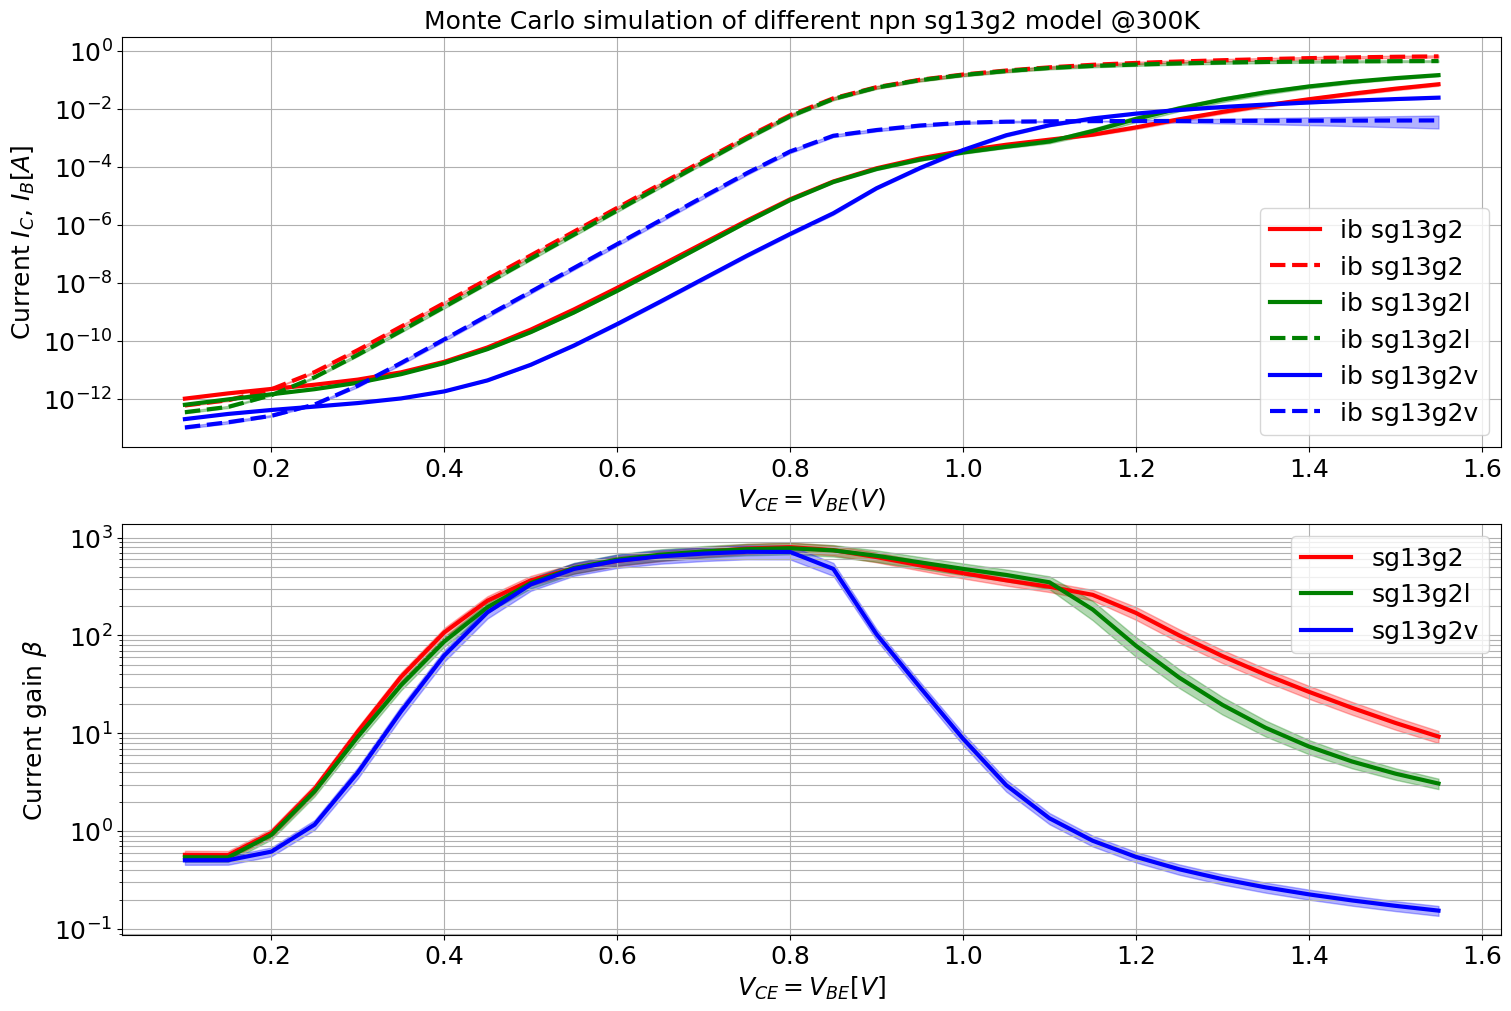

In [103]:
col = ['r','g','b']
plt.figure(figsize = (15,10),constrained_layout=True)

# plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
plt.subplot(211)
plt.gca().set_title('Monte Carlo simulation of different npn sg13g2 model @300K',fontsize = 18)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], ib_mean_MC1[i], color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ib_mean_MC1[i] + ib_std_MC1[i], ib_mean_MC1[i] - ib_std_MC1[i], color = col[i], alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean_MC1[i],linestyle = 'dashed', color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ic_mean_MC1[i] + ic_std_MC1[i], ic_mean_MC1[i] - ic_std_MC1[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
plt.ylabel(r'Current $I_C$, $I_B [A]$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'lower right')
plt.subplot(212)  
# plt.figure(figsize = (15,10),constrained_layout=True)
for i in range(len(ib_mean_MC1)):
    plt.plot(dat_arr[j][:,0], beta_mean_MC1[i],color = col[i], lw = 3, label = f'{dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], beta_mean_MC1[i] + beta_std_MC1[i], beta_mean_MC1[i] - beta_std_MC1[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} [V]$',fontsize = 18)
plt.ylabel(r'Current gain $\beta$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'upper right')
plt.savefig('npn_sg13g2_gummel1.png')
plt.show()

### 1.2.1. Plot beta vs current density instead of beta vs current

In [104]:
Aeg2 = 0.07e-6 * 0.09e-6
Aeg2l = 0.07e-6 * 1e-6
Aeg2v = 0.12e-6 * 2.5e-6
Ae_arr = [Aeg2, Aeg2l, Aeg2v]


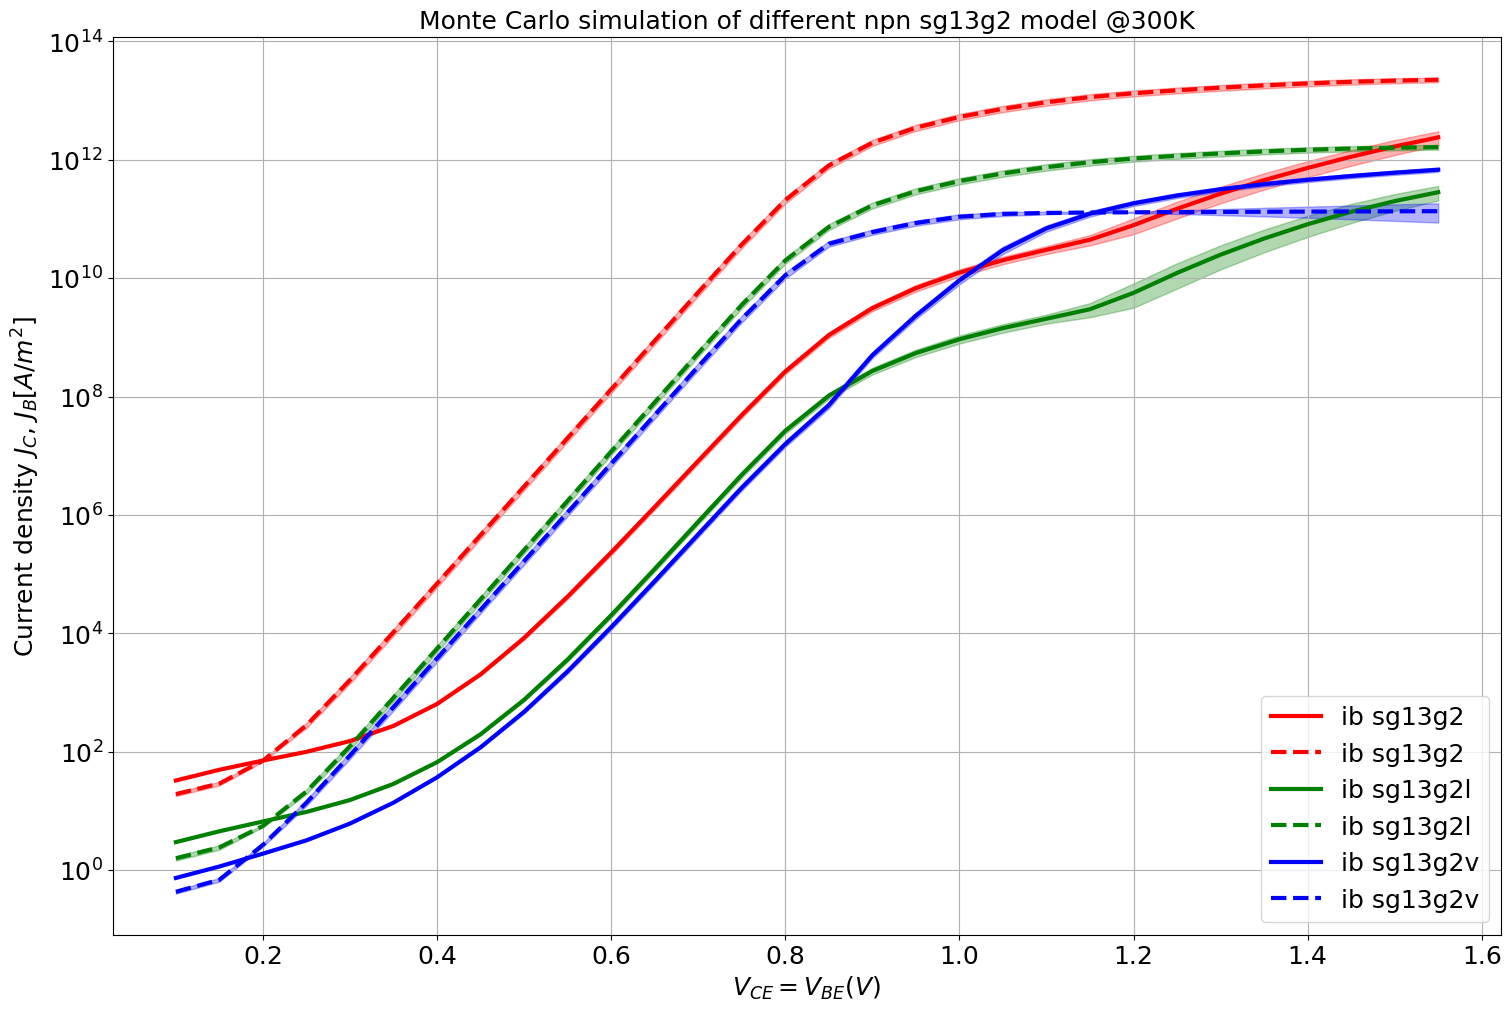

In [105]:
col = ['r','g','b']
plt.figure(figsize = (15,10),constrained_layout=True)

# plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
# plt.subplot(211)
plt.gca().set_title('Monte Carlo simulation of different npn sg13g2 model @300K',fontsize = 18)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], ib_mean_MC[i]/Ae_arr[i], color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ib_mean_MC[i]/Ae_arr[i] + ib_std_MC[i]/Ae_arr[i], ib_mean_MC[i]/Ae_arr[i] - ib_std_MC[i]/Ae_arr[i], color = col[i], alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean_MC[i]/Ae_arr[i],linestyle = 'dashed', color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ic_mean_MC[i]/Ae_arr[i] + ic_std_MC[i]/Ae_arr[i], ic_mean_MC[i]/Ae_arr[i] - ic_std_MC[i]/Ae_arr[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
plt.ylabel(r'Current density $J_C$, $J_B [A/m^2]$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'lower right')
plt.savefig('cur_density_gummel.png')

### 1.2.2. MC simulation in different temperature

In [156]:
#------for temp -196 -153 -53 27 50----------
# MC_sg13g2t = np.genfromtxt('gummel_npn13g2_MCtemp.txt')
# MC_sg13g2t = MC_sg13g2t[1:-1]
# MC_sg13g2lt = np.genfromtxt('gummel_npn13g2l_MCtemp.txt')
# MC_sg13g2lt = MC_sg13g2lt[1:-1]
# MC_sg13g2vt = np.genfromtxt('gummel_npn13g2v_MCtemp.txt')
# MC_sg13g2vt = MC_sg13g2vt[1:-1]
#-----for temp -40 -30 -20 -10 0 10 20 30 ----
MC_sg13g2t = np.genfromtxt('gummel_npn13g2_MCtemp1.txt')
MC_sg13g2t = MC_sg13g2t[1:-1]
MC_sg13g2lt = np.genfromtxt('gummel_npn13g2l_MCtemp1.txt')
MC_sg13g2lt = MC_sg13g2lt[1:-1]
MC_sg13g2vt = np.genfromtxt('gummel_npn13g2v_MCtemp1.txt')
MC_sg13g2vt = MC_sg13g2vt[1:-1]

In [145]:
# VBE = MC_sg13g2t[:,0]


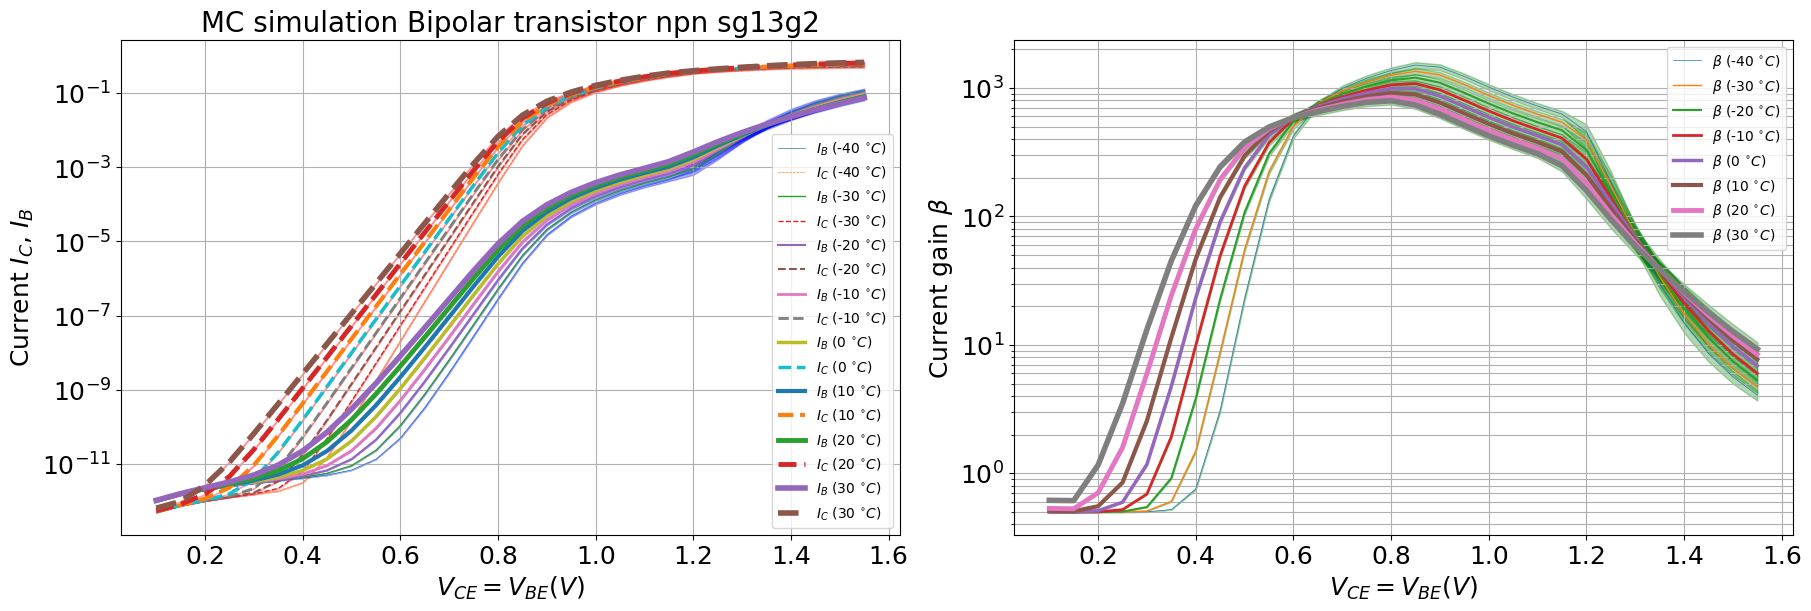

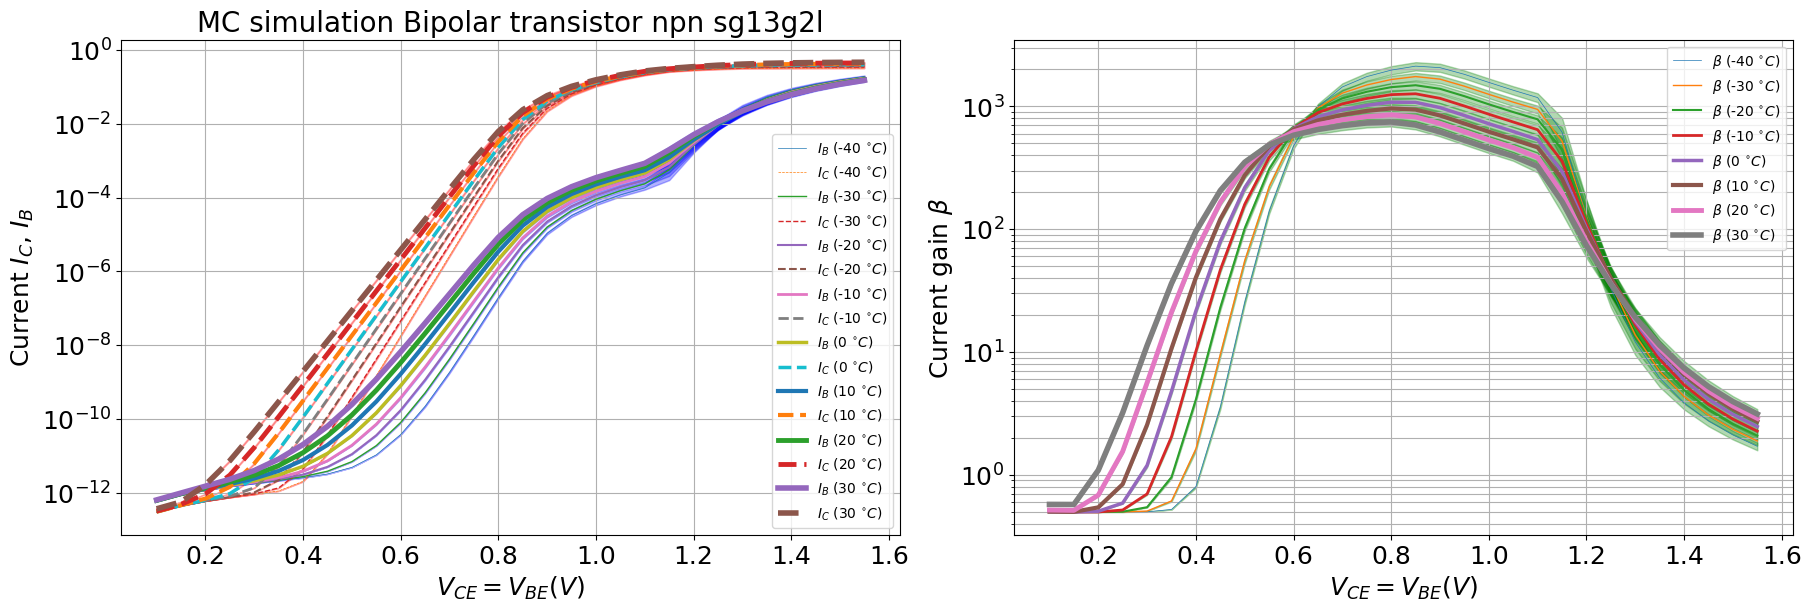

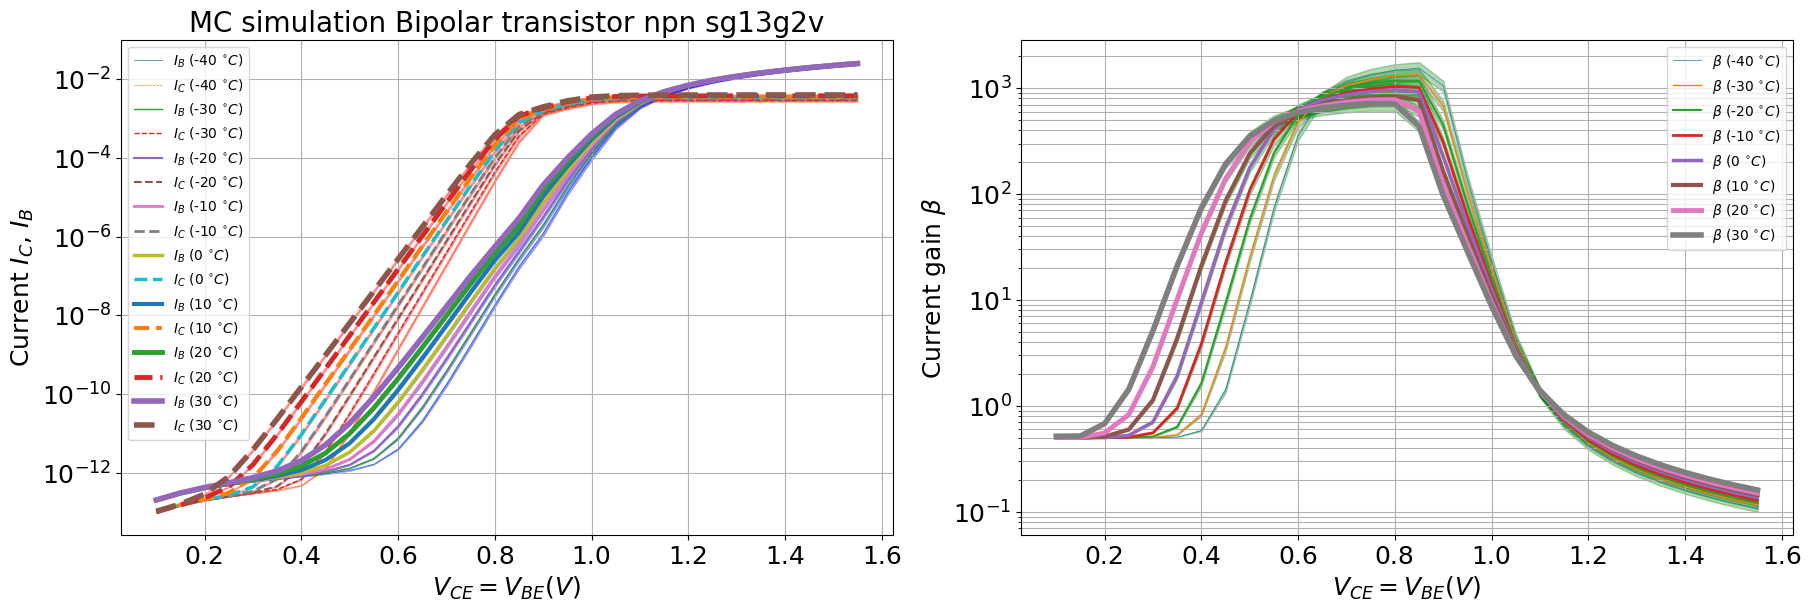

In [165]:
temp = [-196,-123,-53,27,50]
temp = [-40, -30, -20, -10, 0, 10, 20, 30]
# for i in range(len(temp)):
#     temp[i] = temp[i] + 273
ib_mean_MC = []
ic_mean_MC = []
beta_mean_MC = []
ib_std_MC = []
ic_std_MC = []
beta_std_MC = []
MC_num = 100
temp_diff = len(temp)*MC_num 
dat_arr = [MC_sg13g2t,MC_sg13g2lt,MC_sg13g2vt]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(dat_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.subplot(121)
    plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    for i in range(len(temp)):
        ib_mean = np.mean(dat_arr[j][:,1+i*MC_num:MC_num*(i+1)], axis = 1)
        ib_std = np.std(dat_arr[j][:,1+i*MC_num:MC_num*(i+1)], axis = 1)
        ic_mean = np.mean(dat_arr[j][:,1+i*MC_num+temp_diff:MC_num*(i+1)+temp_diff], axis = 1)
        ic_std =   np.std(dat_arr[j][:,1+i*MC_num+temp_diff:MC_num*(i+1)+temp_diff], axis = 1)
        # ib_mean_MC.append(ib_mean)
        # ib_std_MC.append(ib_std )
        # ic_mean_MC.append(ic_mean)
        # ic_std_MC.append(ic_std )
    
        plt.plot(dat_arr[j][:,0], ib_mean, lw = 0.5 + 0.5 * i  ,label = r'$I_B$ (%d $^{\circ} C)$'%temp[i])
        plt.fill_between(dat_arr[j][:,0], ib_mean + ib_std, ib_mean - ib_std, color = 'b', alpha = 0.3)
        plt.plot(dat_arr[j][:,0],ic_mean,linestyle = 'dashed', lw = 0.5 + 0.5 * i  ,label = r'$I_C$ (%d $^{\circ} C$)'%temp[i])
        plt.fill_between(dat_arr[j][:,0], ic_mean + ic_std, ic_mean - ic_std, color = 'r', alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.legend()
    plt.subplot(122)
    for i in range(len(temp)):
        beta_mean = np.mean(dat_arr[j][:,1+i*MC_num+2*temp_diff:MC_num*(i+1)+2*temp_diff], axis = 1)
        beta_std =   np.std(dat_arr[j][:,1+i*MC_num+2*temp_diff:MC_num*(i+1)+2*temp_diff], axis = 1)
        # beta_mean_MC.append(beta_mean)
        # beta_std_MC.append(beta_std )
        plt.plot(dat_arr[j][:,0], beta_mean, lw = 0.5 + 0.5 * i  ,label = r'$\beta$ (%d $^{\circ} C$)'%temp[i])
        plt.fill_between(dat_arr[j][:,0], beta_mean + beta_std, beta_mean - beta_std, color = 'g', alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.legend()
    plt.show()

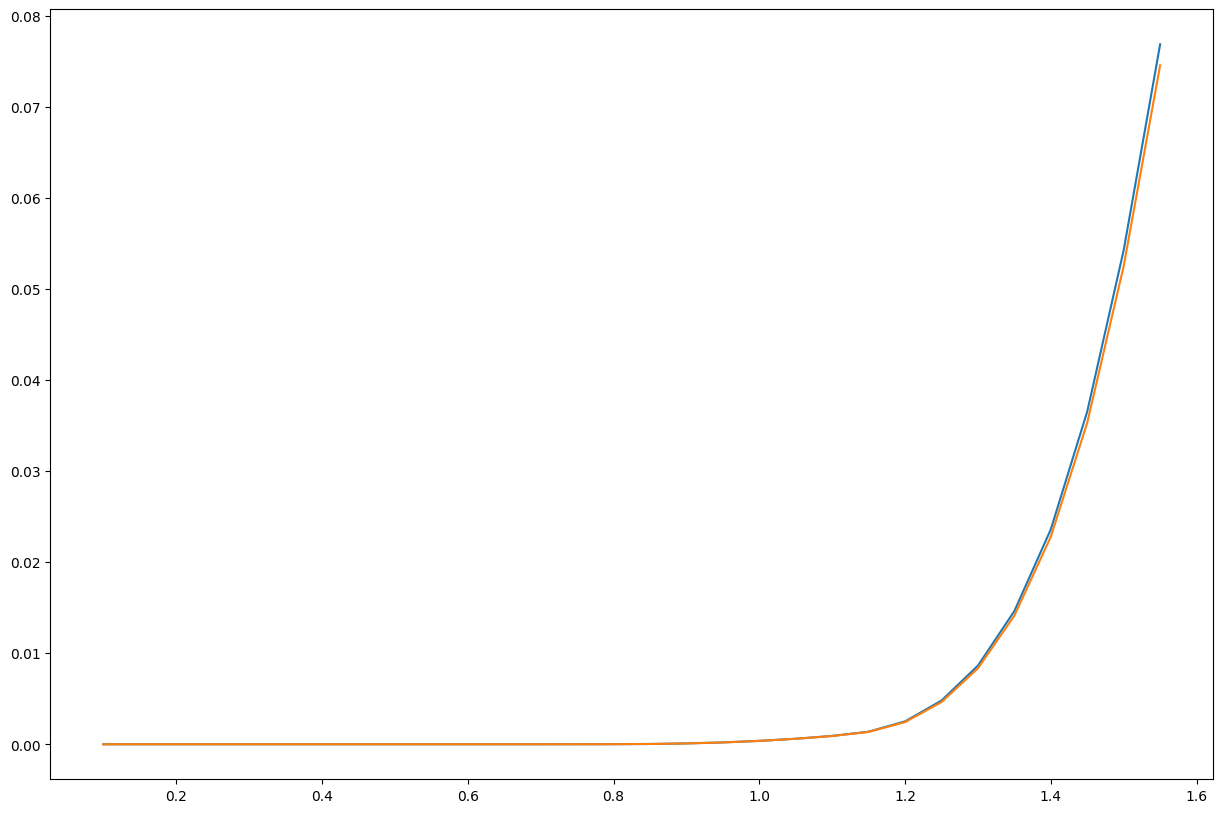

In [138]:
plt.figure(figsize = (15,10))
plt.plot(MC_sg13g2t[:,0],np.mean(MC_sg13g2t[:,1:100], axis = 1))
plt.plot(MC_sg13g2t[:,0],np.mean(MC_sg13g2t[:,101:200], axis = 1))
# plt.semilogy(MC_sg13g2t[:,0], np.mean(MC_sg13g2t[:,1:100],axis = 1)/np.mean(MC_sg13g2t[:,301:400], axis = 1))